# Using Chat GPT to Analyse SQL Data - Building a chatbot in a Streamlit App

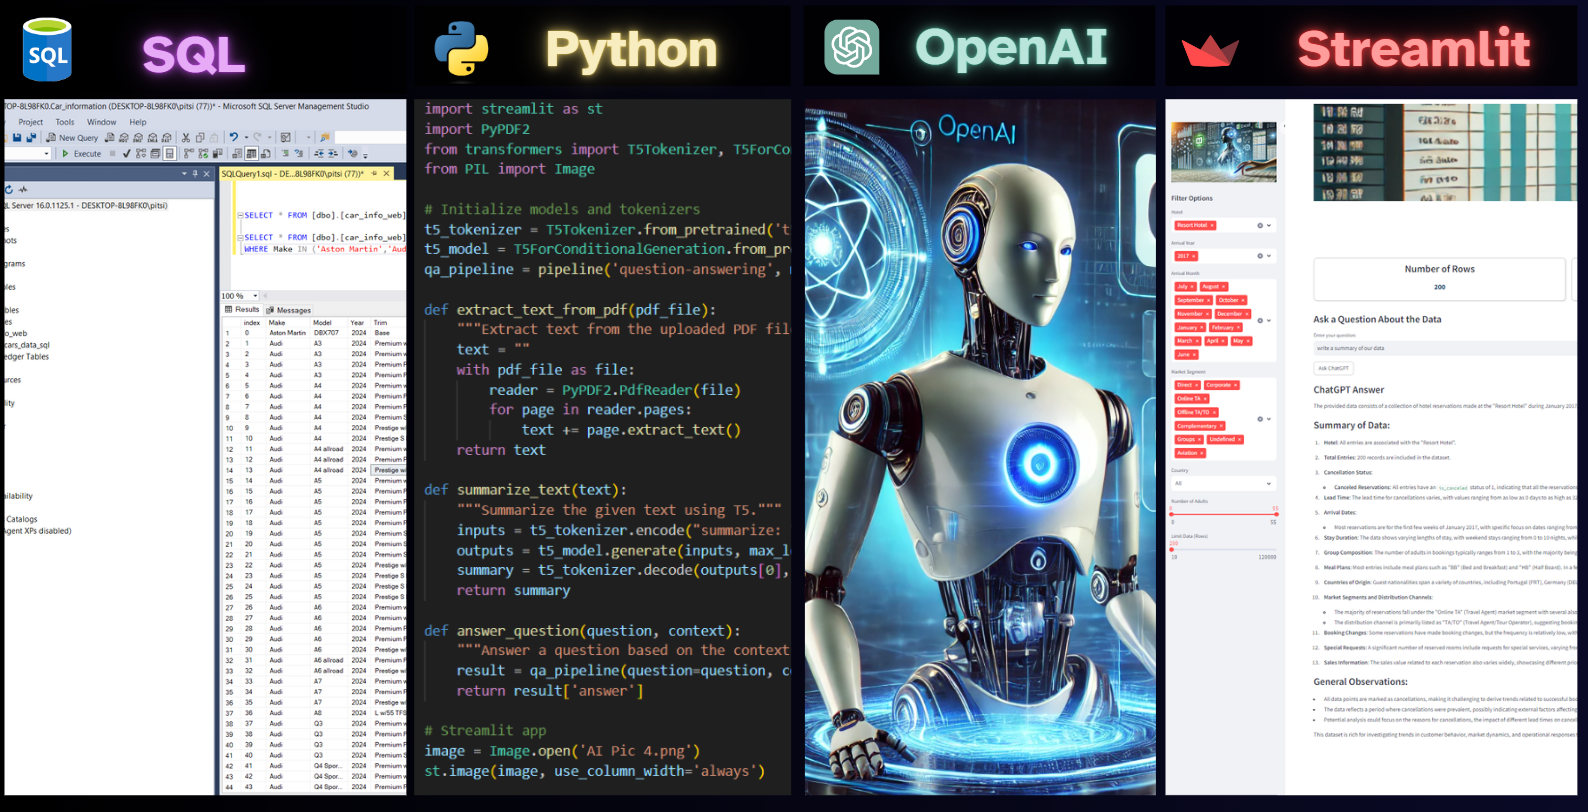

In [11]:
import os
from IPython.display import Image
PATH = "C:\\Users\\pitsi\\Desktop\\2024 Youtube\\7. Chat Gpt to SQL\\"
Image("AI Pic4.png",width=900, height=700)

## Agenda:
- Libraries we need
- Making the connection to SQL Server
- Testing Chat GPT API 
- Testing Chat GPT API on our data
- Creating Streamlit app
- Deployng the app

## 0. Libraries we need

In [ ]:
# pip install streamlit 

In [ ]:
# pip install pypyodbc

In [ ]:
# pip install openai

In [13]:
import pandas as pd
import pypyodbc as podbc
import os
from openai import OpenAI


## 1. Loading the SQL data

In [15]:
#################################################################################################################
##############################   Getting the file from SQL Server      ##########################################
#################################################################################################################


conn2 = podbc.connect("Driver={ODBC Driver 17 for SQL Server};"
                     "Server=DESKTOP-8L98FK0;"
                     "Database=Store_Sales;"
                     "Trusted_Connection=yes;")

# running the SQL query i need
SQL_Query = pd.read_sql_query('''SELECT * FROM [dbo].[Store_Sales]''', conn2)

#conn.close()

limited_data = SQL_Query.head(200)

# Viz
SQL_Query.head()


C:\Users\pitsi\AppData\Local\Temp\ipykernel_8472\504859102.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  SQL_Query = pd.read_sql_query('''SELECT * FROM [dbo].[Store_Sales]''', conn2)


,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.959991,2,0.00,41.913601
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940002,3,0.00,219.582001
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620000,2,0.00,6.871400
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.577515,5,0.45,-383.031006
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368000,2,0.20,2.516400


## 2. Testing the Chat GPT API

In [17]:
# Set your OpenAI API key
# os.environ["OPENAI_API_KEY"] = ""

client = OpenAI(
    # This is the default and can be omitted
    api_key=os.environ.get("OPENAI_API_KEY"),
)

# Create an API Key: https://platform.openai.com/api-keys
# Documentation: https://github.com/openai/openai-python

def testing_queustion(question):
    """Summarizes the text using OpenAI's API."""
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are a helpful assistant that summarizes text."},
            {"role": "user", "content": question}
        ],
        max_tokens=300,
        temperature=0.7
    )
    summary = response.choices[0].message.content
    return summary

testing_queustion("Write a story about BTC")

# Documentation: https://github.com/openai/openai-python
# Create API Key: https://platform.openai.com/settings/profile?tab=api-keys

'Bitcoin (BTC) is a digital currency that was created in 2009 by an unknown person or group of people using the pseudonym Satoshi Nakamoto. It operates on a decentralized network called blockchain, which allows for secure and transparent transactions without the need for a central authority.\n\nBitcoin was the first cryptocurrency and has since gained widespread popularity and acceptance as a form of digital payment. Its value is known for its volatility, with prices fluctuating based on demand and market conditions.\n\nOver the years, Bitcoin has been used for various purposes, from online purchases to investments and even as a store of value. Its decentralized nature has made it attractive to those seeking financial freedom and privacy in their transactions.\n\nDespite facing criticism and skepticism from traditional financial institutions, Bitcoin has continued to thrive and has inspired the creation of thousands of other cryptocurrencies. Its impact on the world of finance and tech

## 3. Testing the Chat GPT API on Our Data

In [19]:
# Set your OpenAI API key
# os.environ["OPENAI_API_KEY"] = ""

client = OpenAI(
    # This is the default and can be omitted
    api_key=os.environ.get("OPENAI_API_KEY"),
)

def query_data(data_json, question, model_name):
    prompt = f"Based on the following relational data, answer the question:\n{data_json}\nQuestion: {question}"
    chat_completion = client.chat.completions.create(
        messages=[
            {"role": "system", "content": "you are a helpful assistant."},
            {"role": "user", "content": prompt}
        ],
        model=model_name,
    )
    return chat_completion.choices[0].message.content

# Limiting the data
limited_data = SQL_Query.head(500)

# Convert DataFrame to JSON or other structured format
data_json = limited_data.to_json(orient='records')

# Define the model you want to use
#model_name = 'gpt-3.5-turbo'  # Change this to the model you want to use
model_name = 'gpt-4o-mini' 
# model pricing: https://openai.com/api/pricing/

# Question to test
question = "Summarize the text"

query_data(data_json, question, model_name)

'The dataset contains a detailed set of purchase orders from various customers in the United States, encompassing a wide range of products primarily related to office supplies and furniture. Each entry includes attributes such as order ID, order date, ship date, customer details (ID, name, segment, city, state, postal code, and region), and product details (ID, category, sub-category, name, sales amount, quantity, discount, and profit).\n\nKey highlights from the data include:\n- **Diverse Products**: The products range from office supplies (like paper, folders, and labels) to furniture (like chairs and tables) and technology accessories (like phones and storage devices).\n- **Customer Segments**: Customers are categorized into segments such as Consumer, Corporate, and Home Office.\n- **Sales and Profit Variability**: Products show a wide range of sales amounts and associated profits, indicating varying levels of customer demand and pricing strategies.\n- **Geographic Distribution**: T

## 4. Bulding the Streamlit app

In [11]:
import streamlit as st
import pandas as pd
import pypyodbc as podbc
import os
from openai import OpenAI
from PIL import Image

# Set your OpenAI API key
os.environ["OPENAI_API_KEY"] = ""

client = OpenAI(
    api_key=os.environ.get("OPENAI_API_KEY"),
)

# Set Streamlit layout to wide and customize page background color
st.set_page_config(layout="wide")

# Set CSS for custom styling (background color, card borders, etc.)
st.markdown("""
    <style>
    .reportview-container {
        background-color: #f0f0f0;
    }
    .sidebar .sidebar-content {
        padding-top: 0px;
    }
    .block-container {
        padding-top: 0rem;
    }
    .custom-card {
        background-color: white;
        padding: 5px;  /* Reduced padding for smaller height */
        border-radius: 10px;
        border: 2px solid #d3d3d3;  /* Slightly reduced border size */
        box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.1);  /* Slightly reduced shadow */
        text-align: center;
        margin-bottom: 10px;  /* Reduced space between cards */
    }
    .custom-card h3 {
        margin-bottom: 2px;  /* Reduced margin below the title */
    }
    .custom-card p {
        color: #003366;  /* Dark Blue Color */
        font-size: 20px;  /* Slightly smaller font size for compactness */
        font-weight: bold;
    }
    .card-container {
        display: flex;
        justify-content: space-between;
        margin-bottom: 10px;
        gap: 10px;  /* Reduced gap between cards */
    }
    .centered-title {
        text-align: center;
        font-size: 32px;
        font-weight: bold;
        margin-bottom: 20px;
    }
    .stDataFrame div[data-testid="stHorizontalBlock"] {
        width: auto !important;
        min-width: 150px !important;  /* Adjusting column width for better visibility */
    }
    </style>
    """, unsafe_allow_html=True)

# Display banner image at the top of the app with reduced height
image = Image.open('AI Pic2.png')
st.image(image, use_column_width=True, caption="Sales and AI Banner", output_format="PNG")

# Centered main title
st.markdown('<h1 class="centered-title">Sales Data Dashboard</h1>', unsafe_allow_html=True)

# Sidebar with an image
image2 = Image.open('AI Pic3.png')
st.sidebar.image(image2, use_column_width=True)
st.sidebar.header("Filter Options")

# Connect to SQL Server
def get_sql_data(query):
    conn2 = podbc.connect("Driver={ODBC Driver 17 for SQL Server};"
                          "Server=DESKTOP-8L98FK0; "
                          "Database=Store_Sales;"
                          "Trusted_Connection=yes;")
    SQL_Query = pd.read_sql_query(query, conn2)
    conn2.close()
    return SQL_Query

# Fetch distinct options for filters
def get_filter_options(column_name):
    query = f"SELECT DISTINCT {column_name} FROM [dbo].[Store_Sales]"
    return get_sql_data(query)[column_name].dropna().tolist()

# Fetch min and max dates for order_date range
def get_date_range():
    query = "SELECT MIN(order_date) as min_date, MAX(order_date) as max_date FROM [dbo].[Store_Sales]"
    result = get_sql_data(query)
    return result['min_date'][0], result['max_date'][0]

# Define the function to query OpenAI
def query_data(data_json, question, model_name):
    prompt = f"Based on the following relational data, answer the question:\n{data_json}\nQuestion: {question}"
    chat_completion = client.chat.completions.create(
        messages=[
            {"role": "system", "content": "you are a helpful assistant."},
            {"role": "user", "content": prompt}
        ],
        model=model_name,
    )
    return chat_completion.choices[0].message.content

# Order Date Range Filter
min_date, max_date = get_date_range()
order_date_range = st.sidebar.date_input("Order Date Range", [min_date, max_date], min_value=min_date, max_value=max_date)

# Segment Filter (Multiselect Drop-down)
segment_options = get_filter_options("segment")
segment = st.sidebar.multiselect("Segment", segment_options, default=segment_options)

# City Filter (Single Select Drop-down)
city_options = get_filter_options("city")
city = st.sidebar.selectbox("City", ["All"] + city_options)

# Category Filter (Multiselect Drop-down)
category_options = get_filter_options("category")
category = st.sidebar.multiselect("Category", category_options, default=category_options)

# Product Name Filter (Single Select Drop-down)
product_name_options = get_filter_options("product_name")
product_name = st.sidebar.selectbox("Product Name", ["All"] + product_name_options)

# Build SQL Query with Filters
query = "SELECT * FROM [dbo].[Store_Sales] WHERE 1=1"
if order_date_range:
    query += f" AND order_date BETWEEN '{order_date_range[0]}' AND '{order_date_range[1]}'"
if segment:
    segment_str = ",".join([f"'{s}'" for s in segment])
    query += f" AND segment IN ({segment_str})"
if city != "All":
    query += f" AND city = '{city}'"
if category:
    category_str = ",".join([f"'{cat}'" for cat in category])
    query += f" AND category IN ({category_str})"
if product_name != "All":
    query += f" AND product_name = '{product_name}'"

# Load and display filtered data
data = get_sql_data(query)

# Add slider for row limit
row_limit = st.sidebar.slider('Limit number of rows:', min_value=0, max_value=1000, value=200)

# Apply row limit to the data
data_limited = data.head(row_limit)

# Calculate Metrics
num_rows = len(data_limited)
num_tokens = num_rows * 30
num_products = data_limited['product_name'].nunique()
sum_sales = data_limited['sales'].sum() if 'sales' in data.columns else 0
sum_profit = data_limited['profit'].sum() if 'profit' in data.columns else 0

# Display cards with metrics
st.markdown('<div class="card-container">', unsafe_allow_html=True)
col1, col2, col3, col4, col5 = st.columns(5)

with col1:
    st.markdown(f'<div class="custom-card"><h3>Number of Rows</h3><p>{num_rows:,}</p></div>', unsafe_allow_html=True)

with col2:
    st.markdown(f'<div class="custom-card"><h3>Number of Tokens</h3><p>{num_tokens:,}</p></div>', unsafe_allow_html=True)

with col3:
    st.markdown(f'<div class="custom-card"><h3>Number of Products</h3><p>{num_products:,}</p></div>', unsafe_allow_html=True)

with col4:
    st.markdown(f'<div class="custom-card"><h3>Sum of Sales</h3><p>${sum_sales:,.2f}</p></div>', unsafe_allow_html=True)

with col5:
    st.markdown(f'<div class="custom-card"><h3>Sum of Profit</h3><p>${sum_profit:,.2f}</p></div>', unsafe_allow_html=True)

st.markdown('</div>', unsafe_allow_html=True)

# Split page layout for Question section (50%) and SQL table (50%)
col_left, col_right = st.columns(2)

# Question section on the left
with col_left:
    st.subheader("Ask a Question About the Data")
    user_question = st.text_input("Enter your question:")

    # Button to ask question
    if st.button("Ask ChatGPT"):
        if user_question:
            answer = query_data(data_limited.to_json(orient='records'), user_question, 'gpt-4o-mini')
            st.subheader("ChatGPT Answer")
            st.write(answer)
        else:
            st.warning("Please enter a question.")

# SQL table section on the right with increased column width for "profit"
with col_right:
    st.subheader("Filtered SQL Data")
    st.dataframe(data_limited.style.set_properties(**{'profit': '150px'}))
    
# Streamlit run Chat_GPT_to_SQL.py

2024-10-03 11:18:02.263 
  command:

    streamlit run Y:\Python\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-10-03 11:18:02.264 Session state does not function when running a script without `streamlit run`
C:\Users\pitsi\AppData\Local\Temp\ipykernel_11204\3281965718.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  SQL_Query = pd.read_sql_query(query, conn2)
